# Quantum Wavepacket under influence of double well potential

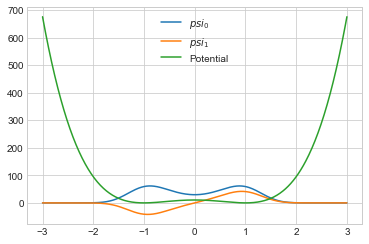

In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

delta = 0.01
L = 3. 
N = 300 # No. of lattice points is 2N+1
x = np.arange(-3.,3.+delta,delta)
b = 2*10**-10
hbar=(6.6*10**(-34))/(2*np.pi) #in Joules
m = 9.1*10**-31 # in kg
ev = 1.6*10**(-19)
E_0 = e = hbar*hbar/(2*m*b*b*ev) #in eV
a = 10 # in eV

def kronecker(i,j):
    return 1 if i==j else 0
def V(z): 
    return ((pow(z,2) - 1)**2)*(a/E_0)
def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors
potential = np.array([V(delta*i) for i in range(-N,N+1)])
psi_0 , psi_1 = H_eigenvectors[:,0] , H_eigenvectors[:,1] # eigenvectors corresponding to ground and first excited state respectively


plt.plot(x, -800*psi_0, label="$psi_0$")
plt.plot(x, -500*psi_1, label="$psi_1$")
plt.plot(x, potential, label="Potential")
plt.legend();

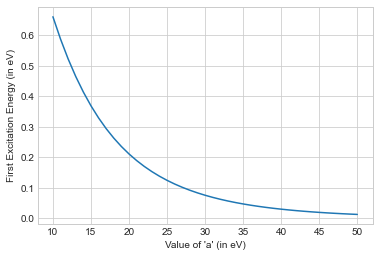

In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

a = np.arange(10.0,51.0,1.0)
E  = []
for i in range(41):
    delta = 0.01
    L = 3. 
    N = 300 # No. of lattice points is 2N+1
    x = np.arange(-3.,3.+delta,delta)
    b = 2*10**-10
    hbar=(6.6*10**(-34))/(2*np.pi) #in Joules
    m = 9.1*10**-31 # in kg
    ev = 1.6*10**(-19)
    E_0 = e = hbar*hbar/(2*m*b*b*ev) #in eV
    p = a[i] #in eV

    def kronecker(i,j):
        return 1 if i==j else 0
    def V(z): 
        return ((pow(z,2) - 1)**2)*(p/E_0)
    def h(i,j):
        return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

    H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
    H_eigenvalues, H_eigenvectors = lin.eig(H)
    idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
    H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
    H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors
    potential = np.array([V(delta*i) for i in range(-N,N+1)])
    psi_0 , psi_1 = H_eigenvectors[:,0] , H_eigenvectors[:,1] # eigenvectors corresponding to ground and first excited state respectively
    e_0 , e_1 = H_eigenvalues[0]*E_0 , H_eigenvalues[1]*E_0
    E.append(e_1 - e_0)

plt.ylabel("First Excitation Energy (in eV)")
plt.xlabel("Value of 'a' (in eV)")
plt.plot(a,E)

    

        
        






